In [3]:
import pandas as pd
import numpy as np
from io import StringIO

In [4]:
csv_data="""
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
9.0,10.0,11.0,
"""
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,9.0,10.0


In [9]:
df.dropna(how='all')# 모든 열이 nan이래 만 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [11]:
df.dropna(thresh=4)# 실수 값이 네 개보다 작은 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [13]:
df.dropna(subset=["C"])#특정열에 nan이 있는 행만 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,9.0,10.0,11.0,NaN


# 누락된 값 대체
가장 흔한 보간 기법 중 하나는 평균으로 대체, 각 특성 열의 전체 평균으로 누락된 값을 바꾸는 것

In [19]:
from sklearn.impute import SimpleImputer

기본적으로 열방향 nan값에 평균을 계산

In [25]:
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(df.values)

In [26]:
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

행 방향으로 nan값에 평균을 계산

In [28]:
from sklearn.preprocessing import FunctionTransformer

In [32]:
ftr_imr=FunctionTransformer(lambda X: imr.fit_transform(X.T).T,validate=False)
imputed_data=ftr_imr.fit_transform(df.values)

In [34]:
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [ 9.        , 10.        , 11.        , 10.        ]])

# fit와 transtorm

fit 메서드를 사용하여 혼룬 데이터에서 모델 파라미터를 학습

transform 메서드를 사용하여 학습한 파라미터를 데이터로 반환

변환하려는 데이터 배열은 모델 학습에 사용한 데이터의 특성 개수와 같아야 한다.

In [4]:
df_wine=pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data',header=None)

In [5]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols'
                ,'Proanthocyanins','Color intensity','Hue','0D280/0D315 of diluted wines','Proline']

In [8]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
print('클래스 레이블',np.unique(df_wine['Class label']))

클래스 레이블 [1 2 3]


In [10]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.fit_transform(X_test)

In [14]:
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

In [15]:
ex=np.array([0,1,2,3,4,5])
print('표준화',(ex-ex.mean())/ex.std())

표준화 [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [16]:
print('정규화',(ex-ex.min())/(ex.max()-ex.min()))

정규화 [0.  0.2 0.4 0.6 0.8 1. ]


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)

In [19]:
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LogisticRegression(solver='liblinear',multi_class='auto',penalty='l1')

LogisticRegression(penalty='l1', solver='liblinear')

In [23]:
lr=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l1',C=1.0,random_state=42)

In [24]:
lr.fit(X_train_std,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [26]:
print('훈련 정확도',lr.score(X_train_std,y_train))

훈련 정확도 1.0


In [27]:
print('테스트 정확도',lr.score(X_test_std,y_test))

테스트 정확도 1.0


In [28]:
lr.intercept_

array([-1.26337062, -1.21589856, -2.37123021])

In [29]:
lr.coef_

array([[ 1.24576659,  0.18058767,  0.74350018, -1.16124724,  0.        ,
         0.        ,  1.16980876,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54766459,  2.51035195],
       [-1.53733962, -0.38708383, -0.99527244,  0.36471957, -0.05950713,
         0.        ,  0.66789801,  0.        ,  0.        , -1.93398986,
         1.2340047 ,  0.        , -2.23193492],
       [ 0.13548833,  0.16993776,  0.35772851,  0.        ,  0.        ,
         0.        , -2.43321771,  0.        ,  0.        ,  1.56140709,
        -0.81736863, -0.49774774,  0.        ]])

In [30]:
import matplotlib.pyplot as plt

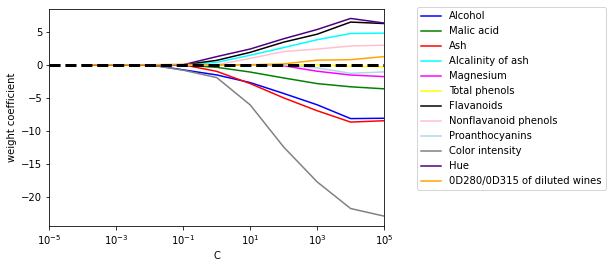

In [35]:
fig=plt.figure()
ax=plt.subplot(111)

colors=['blue','green','red','cyan','magenta','yellow','black','pink','lightblue','gray','indigo','orange']

weights,params=[],[]

for c in np.arange(-4.,6.):
    lr=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l1',C=10.**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights=np.array(weights)

for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

In [49]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring=scoring
        self.estimator=estimator
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_=[score]
        
        while dim>self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
    def transform(self,X):
        return X[:,self.indices_]
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn=KNeighborsClassifier()

In [52]:
sbs=SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)

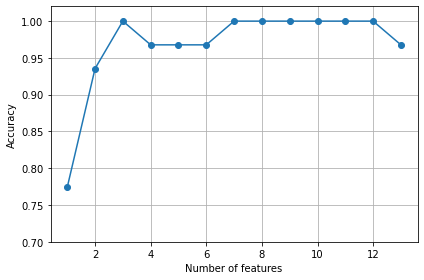

In [55]:
k_feat=[len(k)for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [56]:
k3=list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', '0D280/0D315 of diluted wines'], dtype='object')


In [57]:
knn.fit(X_train_std,y_train)
print('훈련 정확도',knn.score(X_train_std,y_train))

훈련 정확도 0.967741935483871


In [58]:
print('테스트 정확도',knn.score(X_test_std,y_test))

테스트 정확도 0.9814814814814815


In [60]:
knn.fit(X_train_std[:,k3],y_train)
print('훈련 정확도', knn.score(X_train_std[:,k3],y_train))

훈련 정확도 0.9516129032258065


In [62]:
print('테스트 정확도',knn.score(X_test_std[:,k3],y_test))

테스트 정확도 0.9259259259259259


In [63]:
from sklearn.ensemble import RandomForestClassifier

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


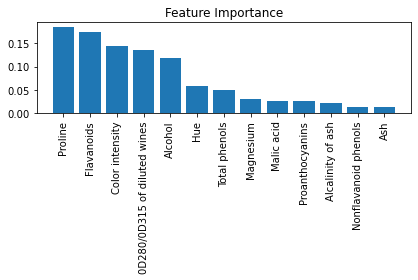

In [69]:
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_

indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [70]:
from sklearn.feature_selection import SelectFromModel

In [72]:
sfm=SelectFromModel(forest,threshold=0.1,prefit=True)
X_selected=sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수: ',X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수:  5


In [76]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" %(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [3]:
from tensorflow.python.client import device_lib

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11310852456300267924]

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [10]:
tf.debugging.set_log_device_placement(True)

# 텐서를 CPU에 할당
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [7]:
tf.debugging.set_log_device_placement(True)

# 텐서를 CPU에 할당
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)